In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from Tri_777 import PINNModel
import os



======================
======================
*EDA*
======================
======================
======================

In [2]:

# CSV 파일 경로 설정
csv_file_path = './experiment_results_newABC.csv'


# 데이터를 DataFrame으로 로드
df1 = pd.read_csv(csv_file_path)
df1


# 실험 범위 설정
# A_range = [1, 7, 13]
# B_range = [2, 7, 12]
# C_range = [3, 7, 11]

,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50
0,1,2,3,4.277876,0.254899,0.354512
1,1,2,7,4.412286,0.248026,0.346223
2,1,2,11,4.896103,0.266427,0.400508
3,1,7,3,4.898705,0.161337,0.319619
4,1,7,7,2.574528,0.005497,0.073197
5,1,7,11,2.972583,0.004107,0.071976
6,1,12,3,4.540983,0.069382,0.283699
7,1,12,7,3.263081,0.002969,0.081589
8,1,12,11,3.749999,0.001308,0.084329
9,7,2,3,17.326273,11.892629,12.192290


In [3]:
df2=df1.copy()

# Calculating new variables for interaction terms
df2['AxB'] = df2['A'] * df2['B']
df2['AxC'] = df2['A'] * df2['C']
df2['BxC'] = df2['B'] * df2['C']

df2_ = df2[['A', 'B', 'C', 'AxB','AxC','BxC','Initial Total Loss',	'Total Loss at 50',	'Avg Loss 0-50']]
df2_

,A,B,C,AxB,AxC,BxC,Initial Total Loss,Total Loss at 50,Avg Loss 0-50
0,1,2,3,2,3,6,4.277876,0.254899,0.354512
1,1,2,7,2,7,14,4.412286,0.248026,0.346223
2,1,2,11,2,11,22,4.896103,0.266427,0.400508
3,1,7,3,7,3,21,4.898705,0.161337,0.319619
4,1,7,7,7,7,49,2.574528,0.005497,0.073197
5,1,7,11,7,11,77,2.972583,0.004107,0.071976
6,1,12,3,12,3,36,4.540983,0.069382,0.283699
7,1,12,7,12,7,84,3.263081,0.002969,0.081589
8,1,12,11,12,11,132,3.749999,0.001308,0.084329
9,7,2,3,14,21,6,17.326273,11.892629,12.192290


In [4]:
df_test = df2_.copy()

# '0-50 loss' 인덱스 생성 (Initial Total Loss - Total Loss at 50)
df_test['0-50 loss'] = df_test['Initial Total Loss'] - df_test['Total Loss at 50']

In [5]:
df_test

,A,B,C,AxB,AxC,BxC,Initial Total Loss,Total Loss at 50,Avg Loss 0-50,0-50 loss
0,1,2,3,2,3,6,4.277876,0.254899,0.354512,4.022977
1,1,2,7,2,7,14,4.412286,0.248026,0.346223,4.164260
2,1,2,11,2,11,22,4.896103,0.266427,0.400508,4.629676
3,1,7,3,7,3,21,4.898705,0.161337,0.319619,4.737368
4,1,7,7,7,7,49,2.574528,0.005497,0.073197,2.569031
5,1,7,11,7,11,77,2.972583,0.004107,0.071976,2.968476
6,1,12,3,12,3,36,4.540983,0.069382,0.283699,4.471601
7,1,12,7,12,7,84,3.263081,0.002969,0.081589,3.260112
8,1,12,11,12,11,132,3.749999,0.001308,0.084329,3.748691
9,7,2,3,14,21,6,17.326273,11.892629,12.192290,5.433644


In [6]:
import seaborn as sns
# Computing the correlation matrix
correlation_matrix = df_test.corr()
correlation_matrix


,A,B,C,AxB,AxC,BxC,Initial Total Loss,Total Loss at 50,Avg Loss 0-50,0-50 loss
A,1.000000e+00,7.237009e-17,2.055969e-16,7.010719e-01,7.756527e-01,-1.544650e-16,0.624234,0.545561,0.575197,0.487047
B,7.237009e-17,1.000000e+00,4.934325e-17,5.842266e-01,5.832110e-17,7.336919e-01,-0.302771,-0.486846,-0.441453,0.092614
C,2.055969e-16,4.934325e-17,1.000000e+00,1.844969e-16,5.171018e-01,5.869535e-01,-0.253234,-0.202711,-0.220352,-0.225116
AxB,7.010719e-01,5.842266e-01,1.844969e-16,1.000000e+00,5.437883e-01,4.286423e-01,0.155063,-0.088717,-0.023317,0.452797
AxC,7.756527e-01,5.832110e-17,5.171018e-01,5.437883e-01,1.000000e+00,3.035147e-01,0.276278,0.247555,0.256434,0.206541
BxC,-1.544650e-16,7.336919e-01,5.869535e-01,4.286423e-01,3.035147e-01,1.000000e+00,-0.446885,-0.481142,-0.486545,-0.214641
Initial Total Loss,6.242335e-01,-3.027706e-01,-2.532337e-01,1.550634e-01,2.762781e-01,-4.468846e-01,1.000000,0.894486,0.948714,0.749874
Total Loss at 50,5.455613e-01,-4.868458e-01,-2.027105e-01,-8.871746e-02,2.475548e-01,-4.811425e-01,0.894486,1.000000,0.988647,0.374961
Avg Loss 0-50,5.751974e-01,-4.414532e-01,-2.203521e-01,-2.331668e-02,2.564340e-01,-4.865446e-01,0.948714,0.988647,1.000000,0.504200
0-50 loss,4.870470e-01,9.261407e-02,-2.251159e-01,4.527974e-01,2.065405e-01,-2.146414e-01,0.749874,0.374961,0.504200,1.000000


<Axes: >

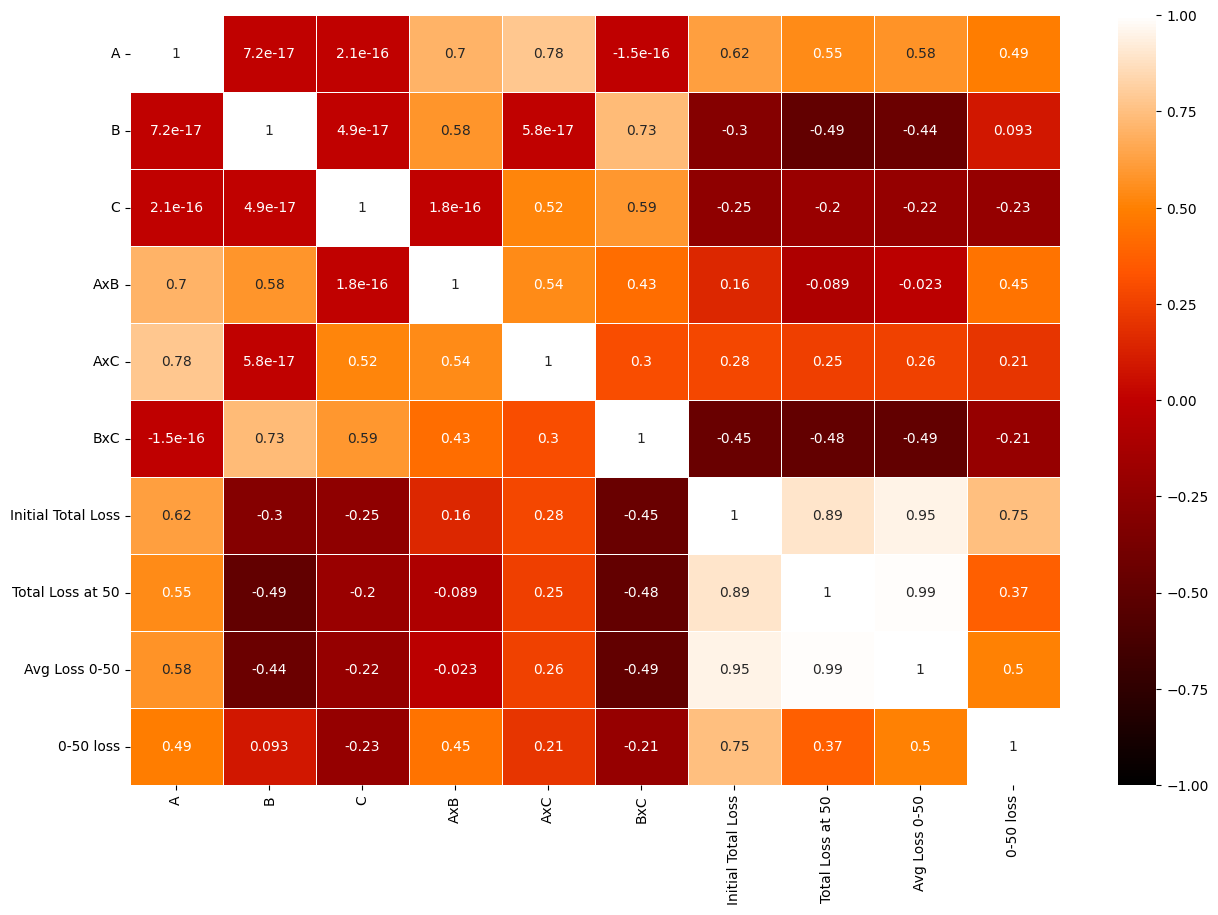

In [7]:

# correlation matrix heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(),vmin=-1, vmax=1, linewidth=0.5, annot=True, cmap=plt.cm.gist_heat)

======================
======================
*정규화 & 클러스터링*
======================
======================
======================

In [8]:

# 데이터프레임 복사
df3 = df1.copy()

# 자연로그 적용
df3 = np.log1p(df3)

# 데이터 정규화를 위한 표준 분포 정규화 객체 생성
scaler = StandardScaler()
df4 = scaler.fit_transform(df3)

# 정규화된 데이터를 DataFrame으로 변환
df4 = pd.DataFrame(df4, columns=df1.columns)
df4


,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50
0,-1.357931,-1.337451,-1.316686,-0.552750,-0.606017,-0.647231
1,-1.357931,-1.337451,0.211405,-0.528888,-0.610003,-0.651601
2,-1.357931,-1.337451,1.105281,-0.447648,-0.599378,-0.623454
3,-1.357931,0.270708,-1.316686,-0.447229,-0.662263,-0.665812
4,-1.357931,0.270708,0.211405,-0.922506,-0.766860,-0.812981
5,-1.357931,0.270708,1.105281,-0.822324,-0.767863,-0.813792
6,-1.357931,1.066743,-1.316686,-0.506590,-0.722144,-0.685461
7,-1.357931,1.066743,0.211405,-0.755358,-0.768687,-0.807436
8,-1.357931,1.066743,1.105281,-0.652738,-0.769890,-0.805635
9,0.336886,-1.337451,-1.316686,0.628385,1.085074,0.973400


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


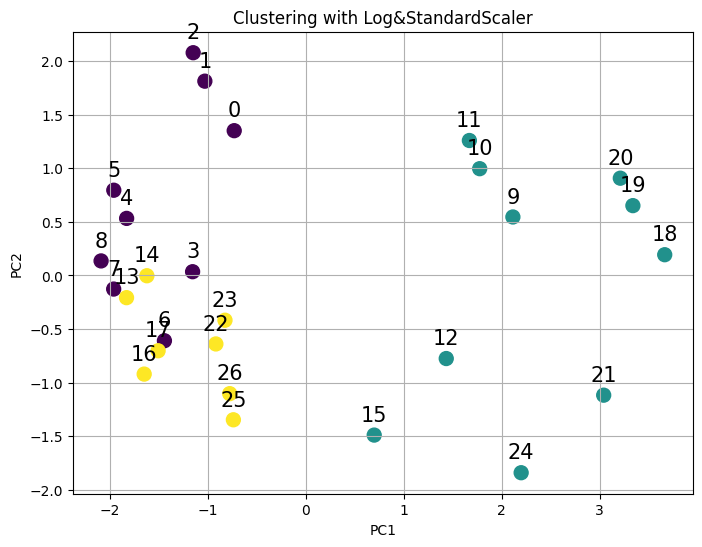

In [9]:

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df4)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
result_pca = pca.fit_transform(df4)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(result_pca[:, 0], result_pca[:, 1], c=clusters, cmap='viridis', s=100)

# 각 점에 라벨 추가
for i, label in enumerate(df4.index):
    plt.annotate(label, (result_pca[i, 0], result_pca[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=15)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering with Log&StandardScaler")
plt.grid(True)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


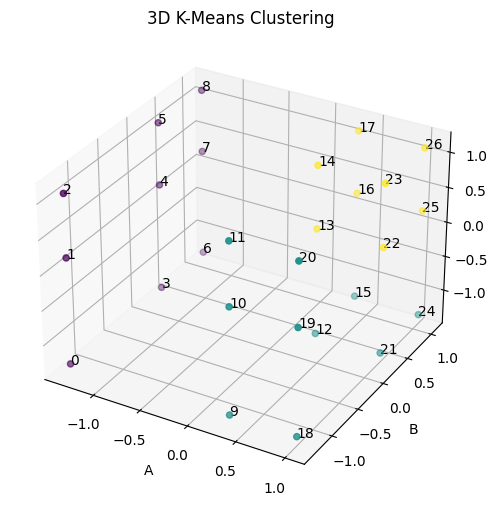

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # 3D 시각화를 위한 라이브러리

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df4)

# 결과 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # 3D 그래프 추가
ax.scatter(df4['A'], df4['B'], df4['C'], c=clusters, cmap='viridis', depthshade=True)

# 각 점에 라벨 추가
for i in range(len(df4)):
    ax.text(df4.iloc[i, 0], df4.iloc[i, 1], df4.iloc[i, 2], '%s' % (df4.index[i]), size=10, zorder=1)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title('3D K-Means Clustering')
plt.show()


======================
======================
*Unseen에 대한 소속 군집 확인 및 거리 계산*
======================
======================
======================

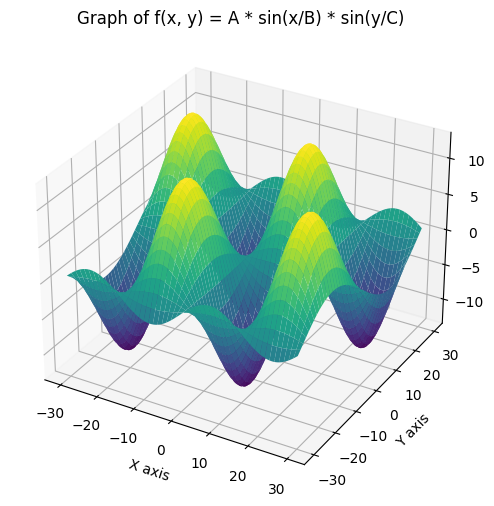

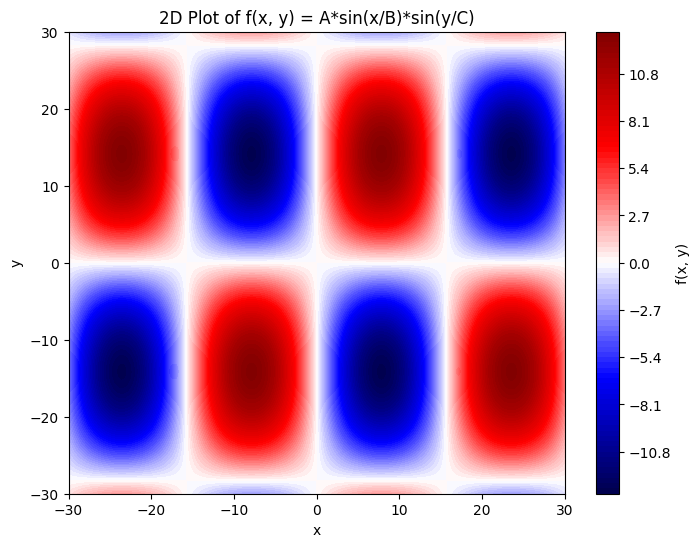

In [11]:
# 변경된 영역

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 사용자가 지정할 수 있도록 A, B, C 값 설정

# 실험 범위 설정
# A_range = [1, 7, 13]
# B_range = [2, 7, 12]
# C_range = [3, 7, 11]

A = 13 # 예시 값
B = 5  # 예시 값
C = 9  # 예시 값

# x, y 값 범위 설정
x = np.linspace(-30, 30, 400)
y = np.linspace(-30, 30, 400)
x, y = np.meshgrid(x, y)

# 함수 f(x, y) = A * sin(x/B) * sin(y/C) 정의
f = A * np.sin(x / B) * np.sin(y / C)

# 3D 플롯 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f, cmap='viridis')

# 레이블 및 타이틀 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Graph of f(x, y) = A * sin(x/B) * sin(y/C)')

# 플롯 표시
plt.show()

# 2D 그래프 그리기
plt.figure(figsize=(8, 6))
plt.contourf(x, y, f, cmap='seismic', levels=100)
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Plot of f(x, y) = A*sin(x/B)*sin(y/C)')
plt.show()

In [12]:

save_directory = os.path.join(f"./pictures/TEST_Trigono_{A},{B},{C}_MSE-1")
# 모델 생성 및 훈련
pinn = PINNModel(A=A, B=B, C=C, epochs=50, model_path="777_1.pth", save_directory=save_directory)
pinn.train()

# 실험 결과를 저장할 리스트
results = []

# 50 에포크에서의 total loss 및 평균 loss 기록
initial_loss = pinn.loss_history[0]  # 0 에포크에서의 손실
total_loss_at_50 = pinn.loss_history[49]
avg_loss_0_50 = sum(pinn.loss_history[:50]) / 50
results.append({"A": A, "B": B, "C": C, "Initial Total Loss": initial_loss, "Total Loss at 50": total_loss_at_50, "Avg Loss 0-50": avg_loss_0_50})

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results)

# 데이터프레임을 CSV 파일로 저장
df_results

ABC=13/5/9, Epoch 0/50, Total Loss: 10.356366297602653, Data Loss: 10.33919072151184, PDE Loss: 0.01717552842455916, LR: 0.002
ABC=13/5/9, Epoch 10/50, Total Loss: 1.3852566123008727, Data Loss: 1.359980972111225, PDE Loss: 0.02527563599869609, LR: 0.002
ABC=13/5/9, Epoch 20/50, Total Loss: 0.8776867881417274, Data Loss: 0.857189254462719, PDE Loss: 0.020497541793156417, LR: 0.002
ABC=13/5/9, Epoch 30/50, Total Loss: 0.7902995191514492, Data Loss: 0.7725599355995655, PDE Loss: 0.01773958783596754, LR: 0.002
ABC=13/5/9, Epoch 40/50, Total Loss: 0.42162499465048314, Data Loss: 0.40703299418091776, PDE Loss: 0.014592002506833523, LR: 0.002


,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50
0,13,5,9,10.356366,0.348432,1.179319


In [13]:
# 데이터프레임의 마지막 인덱스보다 1 큰 값을 새 인덱스로 사용
new_index = df_results.index[-1] + 1

# 새로운 행 데이터 추가
df_results.loc[new_index] = df1.iloc[0]

df_results

,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50
0,13.0,5.0,9.0,10.356366,0.348432,1.179319
1,1.0,2.0,3.0,4.277876,0.254899,0.354512


In [14]:

# # 실험 결과를 저장할 리스트
# results = []

# for A, B, C in experiments:
#     # 디렉토리 이름 생성
#     save_directory = os.path.join("DOE_RESULTS", f"TEST_Trigono_{A},{B},{C}_MSE-1")
#     # 모델 생성 및 훈련
#     pinn = PINNModel(A=A, B=B, C=C, epochs=50, model_path="777_1.pth", save_directory=save_directory)
#     pinn.train()

#     # 50 에포크에서의 total loss 및 평균 loss 기록
#     initial_loss = pinn.loss_history[0]  # 0 에포크에서의 손실
#     total_loss_at_50 = pinn.loss_history[49]
#     avg_loss_0_50 = sum(pinn.loss_history[:50]) / 50
#     results.append({"A": A, "B": B, "C": C, "Initial Total Loss": initial_loss, "Total Loss at 50": total_loss_at_50, "Avg Loss 0-50": avg_loss_0_50})

# # 결과를 데이터프레임으로 변환
# df_results = pd.DataFrame(results)

# # 데이터프레임을 CSV 파일로 저장
# df_results.to_csv("experiment_results.csv", index=False)


In [15]:
# 학습된 평균과 표준편차 저장
saved_means = scaler.mean_
saved_std = scaler.scale_

# 새로운 데이터에 대해 정규화 진행하기
def normalize_new_data(df_new):
    # 새로운 데이터 DataFrame 생성
    # df_new = pd.DataFrame(new_data)

    # 자연로그 적용
    df_new = np.log1p(df_new)

    # 새로운 StandardScaler 객체 생성 후 저장된 평균과 표준편차 적용
    scaler = StandardScaler()
    scaler.mean_ = saved_means
    scaler.scale_ = saved_std

    # 새로운 데이터에 대해 transform 수행
    df_new_normalized = scaler.transform(df_new)

    # 결과를 DataFrame으로 변환
    df_new_normalized = pd.DataFrame(df_new_normalized, columns=df_new.columns)

    return df_new_normalized


# 새로운 데이터 정규화 실행
normalized_data = normalize_new_data(df_results)

# 결과 출력
print(normalized_data)


          A         B         C  Initial Total Loss  Total Loss at 50  \
0  1.021045 -0.200973  0.703340            0.174308         -0.553832   
1 -1.357931 -1.337451 -1.316686           -0.552750         -0.606017   

   Avg Loss 0-50  
0      -0.308627  
1      -0.647231  


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [16]:
# 군집 중심점
cluster_centers = kmeans.cluster_centers_

# 각 포인트에서 군집 중심까지의 거리 계산
distances = kmeans.transform(df4)
distances = pd.DataFrame(distances)
# 결과 출력
distances.columns = ['dist_from0','dist_from1','dist_from2' ]
distances


,dist_from0,dist_from1,dist_from2
0,1.882011,3.902044,3.483291
1,1.362246,3.885490,2.905104
2,1.749827,4.099339,2.913454
3,1.357772,3.893820,2.881210
4,0.467552,4.220800,2.132756
5,1.160396,4.419934,2.126227
6,1.699415,4.192308,2.874550
7,1.100661,4.364761,2.124277
8,1.540231,4.559227,2.125630
9,3.744984,1.322625,4.020586


In [17]:
df4['dist_from0'] = distances['dist_from0']
df4['dist_from1'] = distances['dist_from1']
df4['dist_from2'] = distances['dist_from2']


In [18]:
# 클러스터링 결과를 'Cluster' 열로 추가
df4['Cluster'] = clusters
df4

,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50,dist_from0,dist_from1,dist_from2,Cluster
0,-1.357931,-1.337451,-1.316686,-0.552750,-0.606017,-0.647231,1.882011,3.902044,3.483291,0
1,-1.357931,-1.337451,0.211405,-0.528888,-0.610003,-0.651601,1.362246,3.885490,2.905104,0
2,-1.357931,-1.337451,1.105281,-0.447648,-0.599378,-0.623454,1.749827,4.099339,2.913454,0
3,-1.357931,0.270708,-1.316686,-0.447229,-0.662263,-0.665812,1.357772,3.893820,2.881210,0
4,-1.357931,0.270708,0.211405,-0.922506,-0.766860,-0.812981,0.467552,4.220800,2.132756,0
5,-1.357931,0.270708,1.105281,-0.822324,-0.767863,-0.813792,1.160396,4.419934,2.126227,0
6,-1.357931,1.066743,-1.316686,-0.506590,-0.722144,-0.685461,1.699415,4.192308,2.874550,0
7,-1.357931,1.066743,0.211405,-0.755358,-0.768687,-0.807436,1.100661,4.364761,2.124277,0
8,-1.357931,1.066743,1.105281,-0.652738,-0.769890,-0.805635,1.540231,4.559227,2.125630,0
9,0.336886,-1.337451,-1.316686,0.628385,1.085074,0.973400,3.744984,1.322625,4.020586,1


In [19]:

# Applying softmax after taking negative of distances
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Apply negation to the distance columns
df4[['dist_from0', 'dist_from1', 'dist_from2']] = -df4[['dist_from0', 'dist_from1', 'dist_from2']]

# Apply softmax to the negated values
df4[['dist_from0', 'dist_from1', 'dist_from2']] = softmax(df4[['dist_from0', 'dist_from1', 'dist_from2']].values)

df4[['dist_from0', 'dist_from1', 'dist_from2']]


,dist_from0,dist_from1,dist_from2
0,0.749463,0.099417,0.151120
1,0.772817,0.061979,0.165204
2,0.710345,0.067778,0.221877
3,0.770927,0.061041,0.168032
4,0.824679,0.019332,0.155990
5,0.704685,0.027064,0.268250
6,0.718676,0.059413,0.221911
7,0.715551,0.027356,0.257093
8,0.622768,0.030422,0.346809
9,0.076737,0.865011,0.058252


In [20]:
df4

,A,B,C,Initial Total Loss,Total Loss at 50,Avg Loss 0-50,dist_from0,dist_from1,dist_from2,Cluster
0,-1.357931,-1.337451,-1.316686,-0.552750,-0.606017,-0.647231,0.749463,0.099417,0.151120,0
1,-1.357931,-1.337451,0.211405,-0.528888,-0.610003,-0.651601,0.772817,0.061979,0.165204,0
2,-1.357931,-1.337451,1.105281,-0.447648,-0.599378,-0.623454,0.710345,0.067778,0.221877,0
3,-1.357931,0.270708,-1.316686,-0.447229,-0.662263,-0.665812,0.770927,0.061041,0.168032,0
4,-1.357931,0.270708,0.211405,-0.922506,-0.766860,-0.812981,0.824679,0.019332,0.155990,0
5,-1.357931,0.270708,1.105281,-0.822324,-0.767863,-0.813792,0.704685,0.027064,0.268250,0
6,-1.357931,1.066743,-1.316686,-0.506590,-0.722144,-0.685461,0.718676,0.059413,0.221911,0
7,-1.357931,1.066743,0.211405,-0.755358,-0.768687,-0.807436,0.715551,0.027356,0.257093,0
8,-1.357931,1.066743,1.105281,-0.652738,-0.769890,-0.805635,0.622768,0.030422,0.346809,0
9,0.336886,-1.337451,-1.316686,0.628385,1.085074,0.973400,0.076737,0.865011,0.058252,1


In [21]:
# 열 이름 변경
df4 = df4.rename(columns={'A': 'A_scaled', 'B': 'B_scaled', 'C': 'C_scaled'})

In [22]:
df_final = pd.concat([df1.iloc[:, :3], df4.iloc[:, :3]], axis=1)

# df2의 나머지 열을 합침
df_final = pd.concat([df_final, df4.iloc[:, 3:]], axis=1)

In [23]:
df_final

,A,B,C,A_scaled,B_scaled,C_scaled,Initial Total Loss,Total Loss at 50,Avg Loss 0-50,dist_from0,dist_from1,dist_from2,Cluster
0,1,2,3,-1.357931,-1.337451,-1.316686,-0.552750,-0.606017,-0.647231,0.749463,0.099417,0.151120,0
1,1,2,7,-1.357931,-1.337451,0.211405,-0.528888,-0.610003,-0.651601,0.772817,0.061979,0.165204,0
2,1,2,11,-1.357931,-1.337451,1.105281,-0.447648,-0.599378,-0.623454,0.710345,0.067778,0.221877,0
3,1,7,3,-1.357931,0.270708,-1.316686,-0.447229,-0.662263,-0.665812,0.770927,0.061041,0.168032,0
4,1,7,7,-1.357931,0.270708,0.211405,-0.922506,-0.766860,-0.812981,0.824679,0.019332,0.155990,0
5,1,7,11,-1.357931,0.270708,1.105281,-0.822324,-0.767863,-0.813792,0.704685,0.027064,0.268250,0
6,1,12,3,-1.357931,1.066743,-1.316686,-0.506590,-0.722144,-0.685461,0.718676,0.059413,0.221911,0
7,1,12,7,-1.357931,1.066743,0.211405,-0.755358,-0.768687,-0.807436,0.715551,0.027356,0.257093,0
8,1,12,11,-1.357931,1.066743,1.105281,-0.652738,-0.769890,-0.805635,0.622768,0.030422,0.346809,0
9,7,2,3,0.336886,-1.337451,-1.316686,0.628385,1.085074,0.973400,0.076737,0.865011,0.058252,1


In [24]:
# 새로운 포인트 데이터 예시
new_point = normalized_data.iloc[0].tolist()

# 새로운 포인트의 군집 예측
new_point_cluster = kmeans.predict([new_point])
print(f"새로운 포인트의 군집: {new_point_cluster[0]}")


새로운 포인트의 군집: 2


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [25]:
# 각 군집 중심까지의 거리 계산
distances = kmeans.transform([new_point])

# 거리와 군집 라벨 번호 출력
for i, distance in enumerate(distances[0]):
    print(f"군집 {i}까지의 거리: {distance}")


군집 0까지의 거리: 2.651084930173714
군집 1까지의 거리: 2.871812008442727
군집 2까지의 거리: 1.3863953126926778


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [26]:

# Softmax 변환 함수 정의
def softmax(x):
    e_x = np.exp(x - np.max(x))  # 오버플로 방지를 위해 x의 최대값을 빼줌
    return e_x / e_x.sum(axis=0)

# 각 군집 중심까지의 거리에 대해 Softmax 변환 적용
softmax_distances = softmax(-distances[0])  # 거리가 짧을수록 높은 확률을 가지게 하기 위해 -를 적용

# Softmax 변환된 거리 출력
print("Softmax 변환된 군집 중심까지의 거리:")
for i, softmax_distance in enumerate(softmax_distances):
    print(f"군집 {i}까지의 확률: {softmax_distance}")

Softmax 변환된 군집 중심까지의 거리:
군집 0까지의 확률: 0.18712824487346144
군집 1까지의 확률: 0.1500647856211594
군집 2까지의 확률: 0.6628069695053792


In [27]:
# 데이터프레임을 CSV 파일로 저장
df_final.to_csv("NewABC_cluster_results.csv", index=False)